In [1]:
import math
import collections

import pandas as pd

from keras import regularizers
from keras.models import Model, Sequential
from keras.layers import *

import params
from utils.sequence_data import data_to_sequences_and_labels
from utils.metrics import print_report_for_binary_classfier
from utils.preprocessing import probs_to_binary_classes
from utils.hyperparams import hyperparams_search
from utils.plot import plot_train_validation_metric

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv("../datasets/data_for_models/dataset_1996-01-01_2019-08-22.csv",
                           header=0, parse_dates=[0], index_col=0)

input_shape = (params.LOOKBACK//params.STEP, dataset.shape[-1] )

In [3]:
#params for generating sequences 
train_max_idx = math.ceil(len(dataset)*params.TRAIN_RATIO)
val_max_idx = math.ceil(len(dataset)*(params.TRAIN_RATIO+params.VAL_RATIO))
label_index = len(dataset.columns) -1


# prepare data
train_X, train_Y = data_to_sequences_and_labels(dataset.to_numpy(), params.LOOKBACK, 
                                                params.STEP, 
                                                0, train_max_idx, 
                                                params.DELAY,
                                                label_index) 
val_X, val_Y = data_to_sequences_and_labels(dataset.to_numpy(), params.LOOKBACK, 
                                                params.STEP, 
                                                train_max_idx+1, val_max_idx, 
                                                params.DELAY,
                                                label_index)
test_X, test_Y = data_to_sequences_and_labels(dataset.to_numpy(), params.LOOKBACK, 
                                                params.STEP, 
                                                val_max_idx+1, None, 
                                                params.DELAY,
                                                label_index)

In [6]:
def fc_model(hidden_unit, n_layer, l2_weight, input_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    
    for _ in range(n_layer):
        model.add(Dense(hidden_unit, activation='relu', kernel_regularizer=regularizers.l2(l2_weight)))
        
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [10]:
best_params = hyperparams_search(model_func=fc_model, 
                                 input_shape=input_shape,
                                 train_X=train_X, train_Y=train_Y, 
                                 val_X=val_X, val_Y=val_Y,
                                 num_epoch=2000,
                                 hidden_units=[32,64], 
                                 n_layers=[2,3], 
                                 l2_weights=[0,0.0001,0.001, 0.01],
                                 is_verbose=0)
print("\nbest params = {0}".format(best_params))

cur_avg_loss = 0.2181021807441732, cur_params = {'epochs': 1413, 'n_layer': 2, 'hidden_unti': 32, 'l2_weight': 0}
cur_avg_loss = 0.13490798262713563, cur_params = {'epochs': 150, 'n_layer': 2, 'hidden_unti': 64, 'l2_weight': 0}
cur_avg_loss = 0.21549215026497298, cur_params = {'epochs': 185, 'n_layer': 3, 'hidden_unti': 32, 'l2_weight': 0}
cur_avg_loss = 0.23793167314033192, cur_params = {'epochs': 37, 'n_layer': 3, 'hidden_unti': 64, 'l2_weight': 0}
cur_avg_loss = 0.2437051020322597, cur_params = {'epochs': 48, 'n_layer': 2, 'hidden_unti': 32, 'l2_weight': 0.0001}
cur_avg_loss = 0.23685802913751522, cur_params = {'epochs': 139, 'n_layer': 2, 'hidden_unti': 64, 'l2_weight': 0.0001}
cur_avg_loss = 0.16981264337719315, cur_params = {'epochs': 260, 'n_layer': 3, 'hidden_unti': 32, 'l2_weight': 0.0001}
cur_avg_loss = 0.22610499770977094, cur_params = {'epochs': 167, 'n_layer': 3, 'hidden_unti': 64, 'l2_weight': 0.0001}
cur_avg_loss = 0.2766029347003354, cur_params = {'epochs': 418, 'n_laye

# best result 
best_params = {'epochs': 1048, 'n_layer': 3, 'hidden_unti': 32, 'l2_weight': 0}

In [11]:
#hyperparameters
num_epoch = best_params['epochs'] 
n_layer= best_params['n_layer'] 
hidden_unit=best_params['hidden_unti']  
l2_weight=best_params['l2_weight']
                    

model = fc_model(hidden_unit, n_layer, l2_weight, input_shape)

# #fit the model
history = model.fit(train_X, train_Y,
                    validation_data=(val_X, val_Y),
                    epochs=num_epoch,
                    verbose=1)



Train on 4033 samples, validate on 853 samples
Epoch 1/150
4033/4033 [==============================] - 2s 419us/step - loss: 0.5322 - acc: 0.7575 - val_loss: 0.4441 - val_acc: 0.9039
Epoch 2/150
4033/4033 [==============================] - 1s 134us/step - loss: 0.4951 - acc: 0.7711 - val_loss: 0.2248 - val_acc: 0.9824
Epoch 3/150
4033/4033 [==============================] - 1s 134us/step - loss: 0.4931 - acc: 0.7776 - val_loss: 0.2351 - val_acc: 0.9766
Epoch 4/150
4033/4033 [==============================] - 1s 134us/step - loss: 0.4777 - acc: 0.7781 - val_loss: 0.1772 - val_acc: 0.9836
Epoch 5/150
4033/4033 [==============================] - 1s 131us/step - loss: 0.4776 - acc: 0.7783 - val_loss: 0.2492 - val_acc: 0.9449
Epoch 6/150
4033/4033 [==============================] - 1s 134us/step - loss: 0.4709 - acc: 0.7791 - val_loss: 0.2552 - val_acc: 0.9238
Epoch 7/150
4033/4033 [==============================] - 1s 135us/step - loss: 0.4571 - acc: 0.7830 - val_loss: 0.2027 - val_acc: 0

4033/4033 [==============================] - 1s 136us/step - loss: 0.3147 - acc: 0.8688 - val_loss: 0.2402 - val_acc: 0.8875
Epoch 61/150
4033/4033 [==============================] - 1s 134us/step - loss: 0.3200 - acc: 0.8654 - val_loss: 0.2949 - val_acc: 0.8359
Epoch 62/150
4033/4033 [==============================] - 1s 133us/step - loss: 0.3149 - acc: 0.8726 - val_loss: 0.3345 - val_acc: 0.8218
Epoch 63/150
4033/4033 [==============================] - 1s 134us/step - loss: 0.3096 - acc: 0.8678 - val_loss: 0.2504 - val_acc: 0.8722
Epoch 64/150
4033/4033 [==============================] - 1s 132us/step - loss: 0.3065 - acc: 0.8780 - val_loss: 0.1983 - val_acc: 0.9097
Epoch 65/150
4033/4033 [==============================] - 1s 132us/step - loss: 0.3162 - acc: 0.8651 - val_loss: 0.2949 - val_acc: 0.8394
Epoch 66/150
4033/4033 [==============================] - 1s 132us/step - loss: 0.2924 - acc: 0.8852 - val_loss: 0.2652 - val_acc: 0.8675
Epoch 67/150
4033/4033 [=======================

4033/4033 [==============================] - 1s 132us/step - loss: 0.2522 - acc: 0.9006 - val_loss: 0.4462 - val_acc: 0.7960
Epoch 120/150
4033/4033 [==============================] - 1s 135us/step - loss: 0.2503 - acc: 0.8944 - val_loss: 0.4983 - val_acc: 0.7866
Epoch 121/150
4033/4033 [==============================] - 1s 131us/step - loss: 0.2598 - acc: 0.8899 - val_loss: 0.3125 - val_acc: 0.8476
Epoch 122/150
4033/4033 [==============================] - 1s 136us/step - loss: 0.2598 - acc: 0.8921 - val_loss: 0.2753 - val_acc: 0.8570
Epoch 123/150
4033/4033 [==============================] - 1s 128us/step - loss: 0.2586 - acc: 0.8914 - val_loss: 0.3975 - val_acc: 0.8124
Epoch 124/150
4033/4033 [==============================] - 1s 133us/step - loss: 0.2500 - acc: 0.8976 - val_loss: 0.2775 - val_acc: 0.8664
Epoch 125/150
4033/4033 [==============================] - 1s 133us/step - loss: 0.2475 - acc: 0.9023 - val_loss: 0.4476 - val_acc: 0.7948
Epoch 126/150
4033/4033 [================

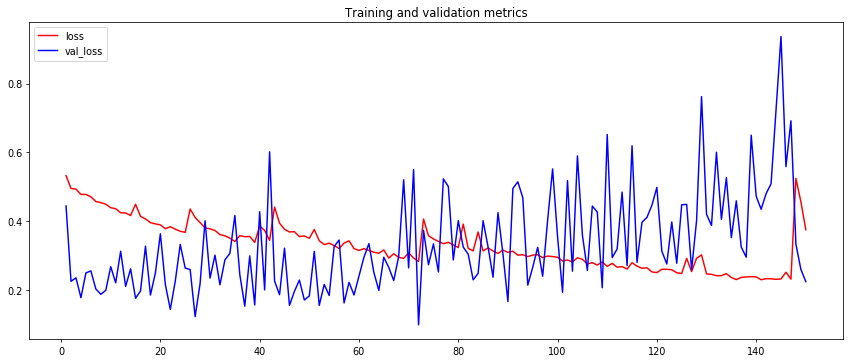

In [12]:
plot_train_validation_metric(history, 'loss', 'val_loss')

### We have 2984 positive and 984 negtive cases. 

In [13]:
#Make predictions for train set   
print(collections.Counter(train_Y))
print_report_for_binary_classfier(train_Y, probs_to_binary_classes(model.predict(train_X)))

Counter({0.0: 3049, 1.0: 984})
F1 score: 0.615200
precision score: 0.748180
recall score: 0.522358
accuracy score: 0.840565
matthews_corrcoef: 0.531942

Confusion matrix:
[[2876  173]
 [ 470  514]]


In [14]:
#Make predictions from dev set
print(collections.Counter(val_Y))
print_report_for_binary_classfier(val_Y, probs_to_binary_classes(model.predict(val_X)))

Counter({0.0: 842, 1.0: 11})
F1 score: 0.130435
precision score: 0.074074
recall score: 0.545455
accuracy score: 0.906213
matthews_corrcoef: 0.175642

Confusion matrix:
[[767  75]
 [  5   6]]


In [15]:
#Make predictions for test set
print(collections.Counter(test_Y))
print_report_for_binary_classfier(test_Y, probs_to_binary_classes(model.predict(test_X)))

Counter({0.0: 811, 1.0: 30})
F1 score: 0.323232
precision score: 0.231884
recall score: 0.533333
accuracy score: 0.920333
matthews_corrcoef: 0.316277

Confusion matrix:
[[758  53]
 [ 14  16]]


# Save the best model 

In [16]:
from keras.models import load_model

model.save(params.BEST_FC_MODEL_PATH)  # creates a HDF5 file 'my_model.h5'